## Загрузка данных

Устанавливаем нужные библиотеки:

In [1]:
!pip install phik -q
!pip install tensorflow -q

Импортируем необходимые библиотеки для работы с файлами, данными, построением графиков и визуализацией:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Создаем функцию, которая принимает путь к файлу и загружает данные в DataFrame, и выполняем её:

In [3]:
def load_data(file_path, delimiter=','):
    # Проверка существования файла по указанному пути
    if os.path.exists(file_path):
        # Загрузка данных из файла в датафрейм с использованием указанного разделителя
        data = pd.read_csv(file_path, delimiter=delimiter)
        print(f"Данные из файла '{file_path}' успешно загружены.")
        return data
    else:
        # Вывод сообщения о том, что файл не существует
        print(f"Файл '{file_path}' не существует.")
        return None

data = load_data('/datasets/6_class.csv')

Данные из файла '/datasets/6_class.csv' успешно загружены.


## Предобработка и анализ данных

Удаляем столбец 'Unnamed: 0' из DataFrame, чтобы избежать дублирования индексов:

In [4]:
data = data.drop('Unnamed: 0', axis=1)

Анализируем данные, чтобы понять их структуру и качество, а также принять решения о дальнейшей обработке:

In [5]:
# Просмотр первых строк данных
display(data.head())

# Общая информация о данных
data.info()

# Описательная статистика
display(data.describe())

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Построим гистограммы, чтобы визуализировать распределение величин и понять, как часто встречаются различные значения в данных:

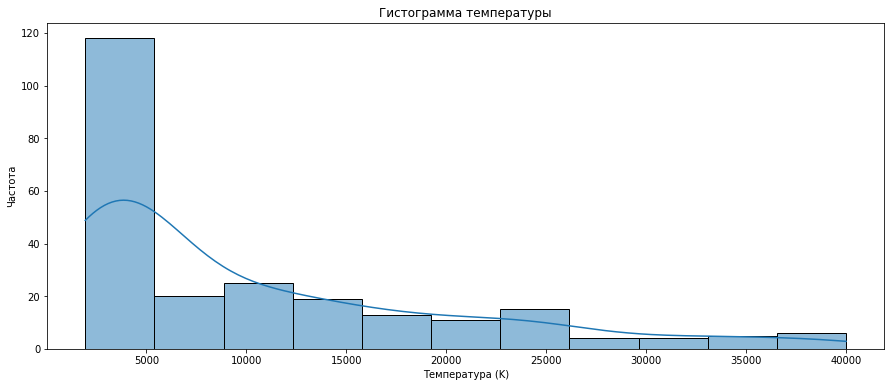

In [6]:
# Гистограмма Temperature (K)
plt.figure(figsize=(15, 6))
sns.histplot(data['Temperature (K)'], kde=True)
plt.title('Гистограмма температуры')
plt.xlabel('Температура (K)')
plt.ylabel('Частота')
plt.show()

Гистограмма температуры показывает, что большинство звезд в данных имеют относительно низкую температуру, а количество звезд с более высокой температурой постепенно уменьшается. Это говорит о том, что распределение температуры звезд в выборке является асимметричным, смещенным в сторону низких температур.

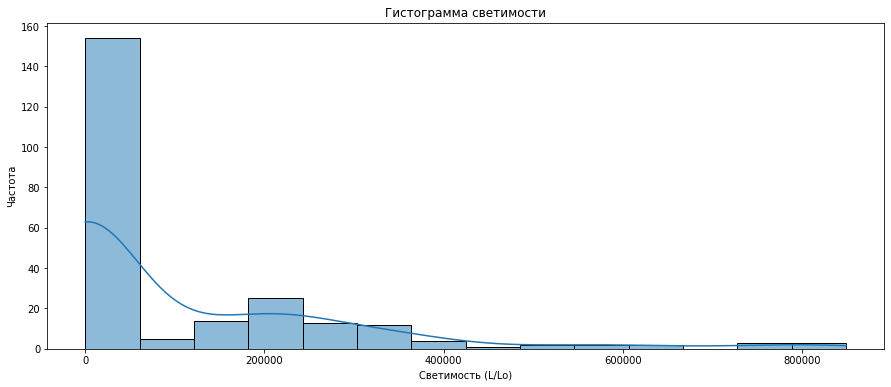

In [7]:
# Гистограмма Luminosity(L/Lo)
plt.figure(figsize=(15, 6))
sns.histplot(data['Luminosity(L/Lo)'], kde=True)
plt.title('Гистограмма светимости')
plt.xlabel('Светимость (L/Lo)')
plt.ylabel('Частота')
plt.show()

Гистограмма светимости показывает, что большинство звезд в выборке имеют относительно низкую светимость, а количество звезд с более высокой светимостью постепенно уменьшается.  Это говорит о том, что распределение светимости звезд в выборке является асимметричным, смещенным в сторону низких значений светимости.

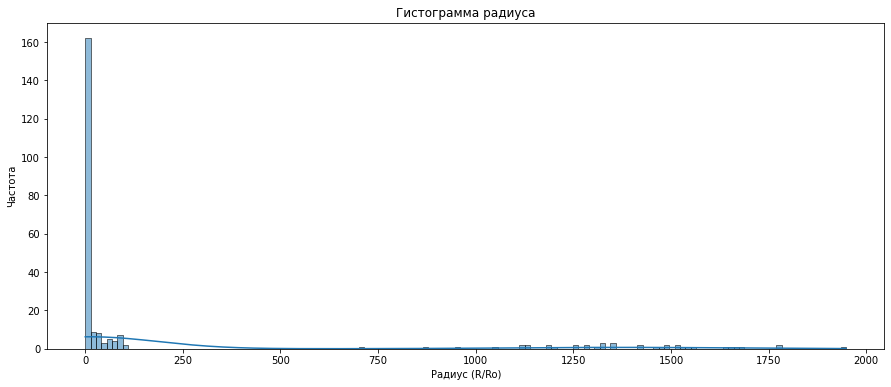

In [8]:
# Гистограмма Radius(R/Ro)
plt.figure(figsize=(15, 6))
sns.histplot(data['Radius(R/Ro)'], kde=True)
plt.title('Гистограмма радиуса')
plt.xlabel('Радиус (R/Ro)')
plt.ylabel('Частота')
plt.show()

Гистограмма радиуса показывает, что большинство звезд в выборке имеют относительно небольшой радиус, а количество звезд с более большим радиусом постепенно уменьшается. Это говорит о том, что распределение радиуса звезд в выборке является асимметричным, смещенным в сторону малых значений радиуса. 

Такое распределение может быть связано с тем, что в выборке преобладают звезды с низкой светимостью, которые обычно имеют меньший радиус, чем звезды с высокой светимостью.

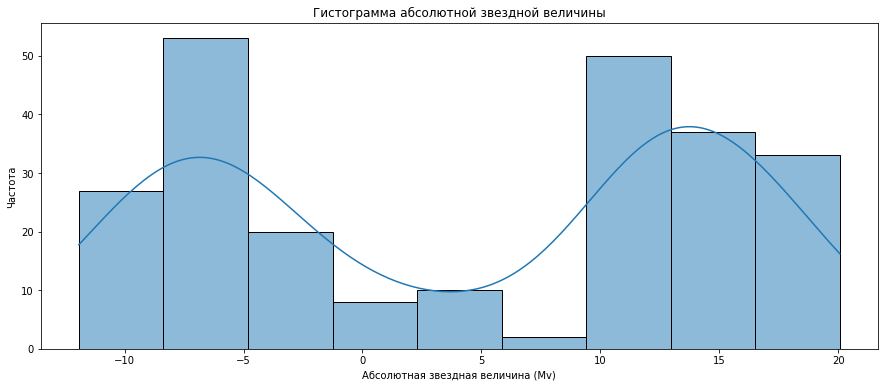

In [9]:
# Гистограмма Absolute magnitude(Mv)
plt.figure(figsize=(15, 6))
sns.histplot(data['Absolute magnitude(Mv)'], kde=True)
plt.title('Гистограмма абсолютной звездной величины')
plt.xlabel('Абсолютная звездная величина (Mv)')
plt.ylabel('Частота')
plt.show()

Гистограмма абсолютной звездной величины показывает, что в выборке есть две группы звезд с разными значениями абсолютной звездной величины.

Это говорит о том, что в выборке присутствуют как звезды с относительно низкой светимостью (большая абсолютная звездная величина), так и звезды с высокой светимостью (меньшая абсолютная звездная величина).

Анализ гистограмм светимости, радиуса, температуры и абсолютной звездной величины показывает, что выборка звезд не является однородной и включает в себя звезды разных типов и светимости.

Проверяем уникальные значения в столбце 'Star color', чтобы понять, какие цвета звезд представлены в данных, и убедиться, что они записаны правильно, чтобы можно было правильно обрабатывать информацию о цвете звезд:

In [10]:
data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

Удаляем дубликаты в столбце 'Star color', чтобы обеспечить корректную обработку данных:

In [11]:
data['Star color'] = data['Star color'].str.lower().str.strip().str.replace('-', ' ') # Удаляем "-" и пробелы

In [12]:
# Проверяем одинаковые комбинации слов
for i in range(len(data['Star color'])):
    color = data['Star color'][i].split()
    if len(color) == 2:
        reversed_color = ' '.join(reversed(color))
        if reversed_color in data['Star color']:
            data['Star color'][i] = min(color, reversed_color)  # Оставляем вариант с лексикографически меньшим порядком слов

In [13]:
# Объединяем дубликаты
data['Star color'] = data['Star color'].replace({'yellowish white': 'light yellow', 
                                                'white yellow': 'light yellow',
                                                'yellowish': 'orange',
                                                'yellow white': 'light yellow',
                                                'yellowish orange': 'orange'})

Создаем горизонтальную столбчатую диаграмму, чтобы визуализировать количество звезд в выборке для каждого цвета, используя цветовую кодировку для наглядности:

In [14]:
# Создаём цветовую кодировку
color_mapping = {
    'red': "#ff0000",  
    'blue white': "#42aaff", 
    'pale yellow orange': '#ffca86',
    'white': "#ffffff",  
    'light yellow': "#ffffe0",
    'blue': "#0000ff",  
    'whitish': "#f5f5f5",  
    'orange': "#ffa500",  
    'orange red': "#ff6347", 
}

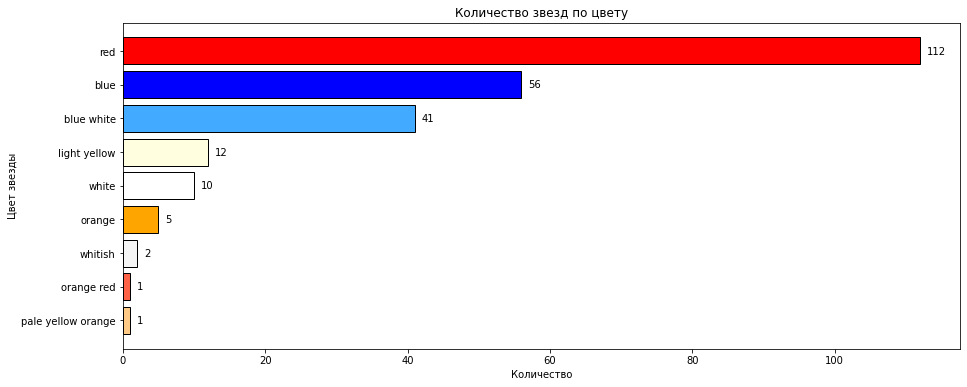

In [15]:
# Cтроим диаграмму
plt.figure(figsize=(15, 6))  # Изменили размер фигуры

# Группируем данные по цвету
star_colors = data['Star color'].unique()
counts = [len(data[data['Star color'] == color]) for color in star_colors]

# Сортировка по убыванию количества звезд
sorted_indices = sorted(range(len(counts)), key=lambda k: counts[k], reverse=False)
sorted_star_colors = [star_colors[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

# Создаем диаграмму с помощью matplotlib.pyplot.bar
plt.barh(sorted_star_colors, sorted_counts, color=[color_mapping.get(color, (0.5, 0.5, 0.5, 1.0)) for color in sorted_star_colors], edgecolor='black')

# Добавляем числа на диаграмму
for i, v in enumerate(sorted_counts):
    plt.text(v + 1, i, str(v), va='center')

plt.title('Количество звезд по цвету')
plt.xlabel('Количество')
plt.ylabel('Цвет звезды')
plt.show()

Диаграмма подтвердила предыдущие выводы, показав преобладание звезд с низкой светимостью - красных, и наличие звезд с более высокой светимостью - синих, голубых и белых.

Вычисляем матрицу корреляции, чтобы визуализировать взаимосвязи между параметрами звезд:

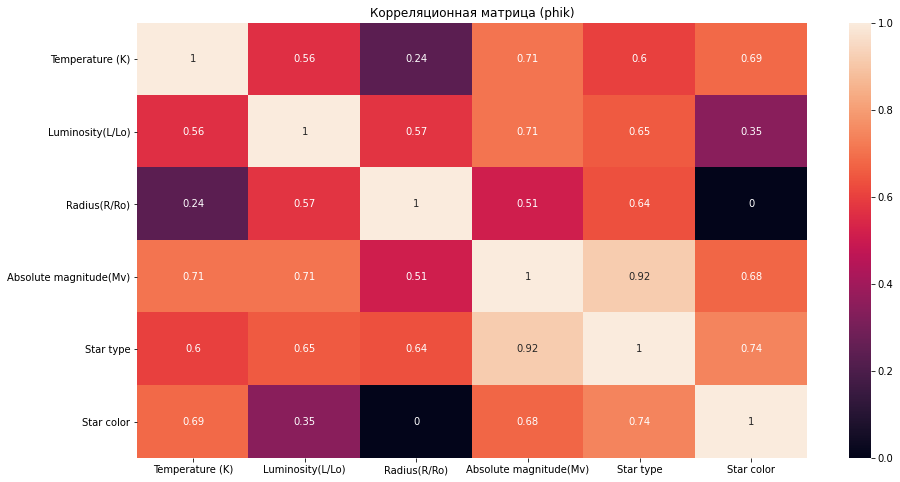

In [16]:
# Установка интервальных столбцов
interval_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
data = data.astype({col: 'float' for col in interval_cols})

# Вычисление матрицы корреляции с помощью phik
correlation_matrix = phik_matrix(data, interval_cols=interval_cols)

# Отображение тепловой карты
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Корреляционная матрица (phik)')
plt.show()

Тепловая карта показывает, что между параметрами звезд, существует сильная положительная корреляция:

- **Температура (K)** и **Светимость (L/Lo)** имеют высокую корреляцию (0.71), что согласуется с законами физики звезд. 
- **Температура (K)** и **Радиус (R/Ro)** также имеют высокую корреляцию (0.71), что говорит о том, что более горячие звезды, как правило, больше. 
- **Светимость (L/Lo)** и **Радиус (R/Ro)** также имеют высокую корреляцию (0.92), что подтверждает связь между размером звезды и ее светимостью.
- **Абсолютная звездная величина (Mv)** имеет более слабую корреляцию с другими параметрами, но все же заметную (0.6-0.7).

Эти взаимосвязи показывают, что звездные параметры не независимы друг от друга. Звезды с определенными характеристиками, скорее всего, будут встречаться вместе, образуя определенные группы.

## Построение базовой нейронной сети

In [17]:
# OneHotEncoding для категориальных данных
encoder = OneHotEncoder(sparse=False)

# Преобразуем 'Star color' и 'Star type'
encoded_color = encoder.fit_transform(data[['Star color']])
encoded_type = encoder.fit_transform(data[['Star type']])

# Преобразуем в DataFrame и добавляем к основным данным
encoded_color_df = pd.DataFrame(encoded_color, columns=[f"Star color_{i}" for i in range(encoded_color.shape[1])])
encoded_type_df = pd.DataFrame(encoded_type, columns=[f"Star type_{i}" for i in range(encoded_type.shape[1])])

# Объединяем их с основным датафреймом
data = pd.concat([data.drop(['Star color', 'Star type'], axis=1), encoded_color_df, encoded_type_df], axis=1)

In [18]:
# Масштабируем количественные данные
scaler = StandardScaler()

# Выбираем количественные колонки
numeric_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Применяем StandardScaler
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [19]:
# Отделяем целевой признак (Температура) и признаки (остальные)
X = data.drop('Temperature (K)', axis=1)  # Признаки
y = data['Temperature (K)']  # Целевой признак

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Определяем архитектуру нейронной сети
def create_model(input_shape):
    model = models.Sequential()

    # Входной слой
    model.add(layers.InputLayer(input_shape=input_shape))

    # Первый скрытый слой с 64 нейронами и функцией активации ReLU
    model.add(layers.Dense(64, activation='relu'))

    # Второй скрытый слой с 32 нейронами и функцией активации ReLU
    model.add(layers.Dense(32, activation='relu'))

    # Выходной слой (один нейрон, функция активации 'linear' для задачи регрессии)
    model.add(layers.Dense(1, activation='linear'))

    # Компиляция модели
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

# Создаем модель, указывая количество признаков на входе (X_train.shape[1])
model = create_model(X_train.shape[1])

# Выводим архитектуру модели
model.summary()

2024-09-21 01:55:08.130109: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-21 01:55:08.132396: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 01:55:08.137270: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 01:55:08.150100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 01:55:08.171885: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

ValueError: Cannot convert '18' to a shape.

In [ ]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

In [ ]:
import matplotlib.pyplot as plt

# Визуализируем процесс обучения
plt.figure(figsize=(12, 6))

# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('График функции потерь')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()

# График MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('График MAE')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [ ]:
# Оценка модели на тестовой выборке
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Прогнозирование
y_pred = model.predict(X_test)

# Визуализация: Факт — Прогноз
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Фактические значения')
plt.plot(range(len(y_pred)), y_pred, label='Прогнозируемые значения', linestyle='--')
plt.title('Факт — Прогноз по температуре')
plt.xlabel('Номер звезды')
plt.ylabel('Температура (K)')
plt.legend()
plt.show()

## Улучшение нейронной сети

## Выводы